# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library for handle warning
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATA

**Melakukan import data .csv from data preprocessing yang sudah bersih**

In [2]:
df = pd.read_csv('D:\MyProject\Telco Churn Prediction\DATA\data_clean.csv')

In [3]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,Churn
0,0,0,29.85,29.85,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0
1,1,0,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,2,0,53.85,108.15,0,1,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
3,3,0,42.30,1840.75,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,70.70,151.65,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [4]:
# drop kolom Unnamed

df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,Churn
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


# SPLITTING DATA

In [5]:
# Splitting Dataset into train and test set

X = df.drop('Churn', axis=1)
y = df['Churn']

In [6]:
from sklearn.model_selection import train_test_split # import train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5625, 50)
(1407, 50)


# MODELLING

## RANDOM FOREST

In [13]:
from sklearn.ensemble import RandomForestClassifier # import library for call random forest algorithm

clf = RandomForestClassifier(n_estimators=700,criterion='gini', max_depth=10, max_features='log2', random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc = clf.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [14]:
# Training Model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=700,
                       random_state=0)

In [15]:
# Making Prediction
pred_rf = rfc.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix # algorithm for confusion matrix
from sklearn.metrics import classification_report # algorithm for classification report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # algorithm for call accuracy_score, precision_score, recall score and f1-score

# Calculating Accuracy Score
print('Accuracy :', round(accuracy_score(y_test, pred_rf)*100,2),"%")
print('Precision :', round(precision_score(y_test, pred_rf, average='weighted', zero_division=0)*100,2),"%")
print('Recall :', round(recall_score(y_test, pred_rf, average='weighted', zero_division=0)*100,2),"%")
print('f1-score :', round(f1_score(y_test,	pred_rf, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 80.03 %
Precision : 78.83 %
Recall : 80.03 %
f1-score : 78.94 %


In [28]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.66      0.49      0.56       369

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



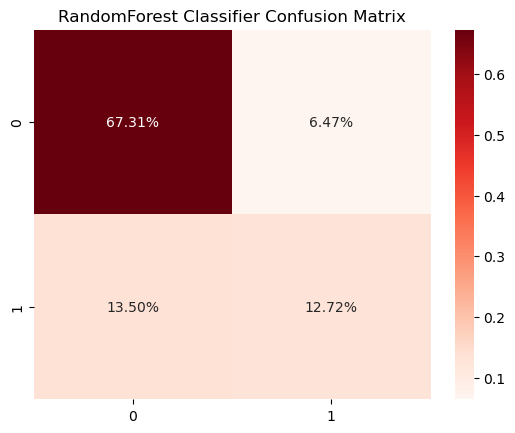

In [29]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

## DECISION TREE

In [19]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
  'splitter' : ['best', 'random'],
  'max_features': ['auto', 'sqrt', 'log2'],
  'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'criterion' :['gini', 'entropy']
}

dfc=DecisionTreeClassifier(random_state=0)
CV_dfc = GridSearchCV(estimator=dfc, verbose=3, param_grid=param_grid, cv = 3)
CV_dfc.fit(X_train, y_train)
CV_dfc.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=best;, score=0.775 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=best;, score=0.763 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'random'}

In [20]:
clf = DecisionTreeClassifier(splitter='random',criterion='entropy', max_depth=10, max_features='log2', random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
dfc = clf.fit(X_train,y_train)
y_pred = dfc.predict(X_test)

In [21]:
# Training Model
dfc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       random_state=0, splitter='random')

In [22]:
# Making Prediction
pred_dt = dfc.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix # algorithm for confusion matrix
from sklearn.metrics import classification_report # algorithm for classification report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # algorithm for call accuracy_score, precision_score, recall score and f1-score

# Calculating Accuracy Score
print('Accuracy :', round(accuracy_score(y_test, pred_dt)*100,2),"%")
print('Precision :', round(precision_score(y_test, pred_dt, average='weighted', zero_division=0)*100,2),"%")
print('Recall :', round(recall_score(y_test, pred_dt, average='weighted', zero_division=0)*100,2),"%")
print('f1-score :', round(f1_score(y_test,	pred_dt, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 77.83 %
Precision : 76.54 %
Recall : 77.83 %
f1-score : 76.89 %


In [31]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1038
           1       0.60      0.47      0.53       369

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



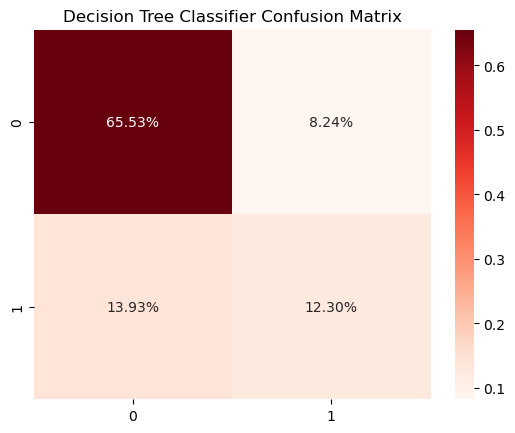

In [32]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=12)
plt.show()

## SVM

In [33]:
from sklearn.svm import SVC

param_grid = {
    'kernel':['rbf'], 
    'C':[0.0001, 1, 10], 
    'gamma':[1, 10, 100]
}

sv = SVC(random_state=0)
CV_sv = GridSearchCV(estimator=sv, verbose = 3, param_grid=param_grid, cv= 3)
CV_sv.fit(X_train, y_train)
CV_sv.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .....C=0.0001, gamma=1, kernel=rbf;, score=0.733 total time=   1.9s
[CV 2/3] END .....C=0.0001, gamma=1, kernel=rbf;, score=0.733 total time=   1.8s
[CV 3/3] END .....C=0.0001, gamma=1, kernel=rbf;, score=0.733 total time=   2.1s
[CV 1/3] END ....C=0.0001, gamma=10, kernel=rbf;, score=0.733 total time=   2.2s
[CV 2/3] END ....C=0.0001, gamma=10, kernel=rbf;, score=0.733 total time=   2.1s
[CV 3/3] END ....C=0.0001, gamma=10, kernel=rbf;, score=0.733 total time=   2.0s
[CV 1/3] END ...C=0.0001, gamma=100, kernel=rbf;, score=0.733 total time=   1.8s
[CV 2/3] END ...C=0.0001, gamma=100, kernel=rbf;, score=0.733 total time=   2.1s
[CV 3/3] END ...C=0.0001, gamma=100, kernel=rbf;, score=0.733 total time=   2.1s
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.738 total time=   3.8s
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.741 total time=   4.2s
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;,

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [34]:
model_svm = SVC(C = 1, kernel='rbf', gamma = 1, random_state=0)

In [35]:
model_svm.fit(X_train, y_train)

SVC(C=1, gamma=1, random_state=0)

In [36]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [37]:
# Calculating Accuracy Score
print('Accuracy :', round(accuracy_score(y_test, pred_svm)*100,2),"%")
print('Precision :', round(precision_score(y_test, pred_svm, average='weighted', zero_division=0)*100,2),"%")
print('Recall :', round(recall_score(y_test, pred_svm, average='weighted', zero_division=0)*100,2),"%")
print('f1-score :', round(f1_score(y_test,	pred_svm, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 74.48 %
Precision : 72.85 %
Recall : 74.48 %
f1-score : 65.33 %


In [38]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1038
           1       0.68      0.05      0.10       369

    accuracy                           0.74      1407
   macro avg       0.71      0.52      0.47      1407
weighted avg       0.73      0.74      0.65      1407



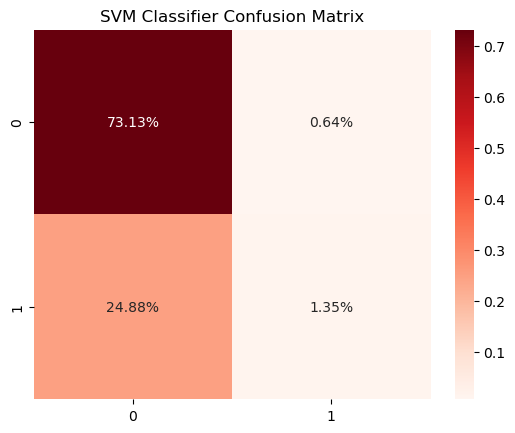

In [39]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("SVM Classifier Confusion Matrix",fontsize=12)
plt.show()

**Seperti yang Anda lihat, akurasinya cukup rendah, dan karena ini merupakan kumpulan data yang tidak seimbang, kita tidak boleh menganggap Akurasi sebagai metrik untuk mengukur model, karena Akurasi dikutuk dalam kumpulan data yang tidak seimbang.
Oleh karena itu, kita perlu memeriksa skor recall, presisi & f1 untuk kelas minoritas, dan cukup jelas bahwa skor presisi, recall & f1 terlalu rendah untuk Kelas 1, yaitu pelanggan yang churn.
Oleh karena itu, selanjutnya memanggil SMOTEENN (UpSampling + ENN)**

# MODELLING USING SMOOTE FOR IMBALANCE DATA

In [42]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()

X_resampling, y_resampling = sm.fit_resample(X,y)

In [43]:
X_resampling.shape, y_resampling.shape

((5900, 50), (5900,))

In [44]:
X_trains, X_tests, y_trains, y_tests = train_test_split(X_resampling, y_resampling, test_size=0.2, random_state=0)

## RANDOM FOREST USING SMOOTE 

In [47]:
param_grid = {
 'n_estimators': [200, 500, 700],
 'max_features': ['sqrt', 'log2'],
 'max_depth' : [10,20,30,40,50],
 'criterion' :['gini', 'entropy'],
}

rfc=RandomForestClassifier(random_state=0)
CV_rfc = GridSearchCV(estimator=rfc, verbose=3, param_grid=param_grid, cv = 3)
CV_rfc.fit(X_trains, y_trains)
CV_rfc.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200;, score=0.949 total time=   1.6s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200;, score=0.950 total time=   1.3s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=200;, score=0.950 total time=   1.3s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.951 total time=   3.5s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.951 total time=   3.2s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=500;, score=0.951 total time=   3.1s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=700;, score=0.950 total time=   4.3s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=700;, score=0.951 total time=   4.5s
[CV 3/3] END criterion=gini, max_depth=10,

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'log2',
 'n_estimators': 200}

In [52]:
clf_smt = RandomForestClassifier(criterion='entropy', n_estimators=200, max_depth=30, max_features='log2', random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc_smt = clf_smt.fit(X_trains, y_trains)
y_pred = rfc_smt.predict(X_tests)

In [53]:
# Training Model
rfc_smt.fit(X_trains, y_trains)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='log2',
                       n_estimators=200, random_state=0)

In [54]:
# Making Prediction
pred_rf_smt = rfc_smt.predict(X_tests)

In [55]:
# Calculating Accuracy Score
print('Accuracy :', round(accuracy_score(y_tests, pred_rf_smt)*100,2),"%")
print('Precision :', round(precision_score(y_tests, pred_rf_smt, average='weighted', zero_division=0)*100,2),"%")
print('Recall :', round(recall_score(y_tests, pred_rf_smt, average='weighted', zero_division=0)*100,2),"%")
print('f1-score :', round(f1_score(y_tests,	pred_rf_smt, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 95.51 %
Precision : 95.51 %
Recall : 95.51 %
f1-score : 95.5 %


In [64]:
print(classification_report(y_tests,pred_rf_smt))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       533
           1       0.95      0.97      0.96       647

    accuracy                           0.96      1180
   macro avg       0.96      0.95      0.95      1180
weighted avg       0.96      0.96      0.96      1180



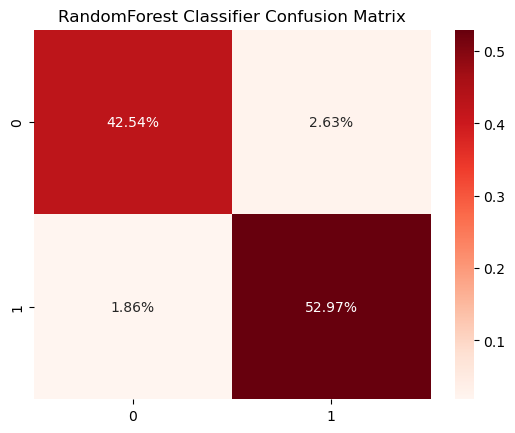

In [58]:
# confusion Maxtrix
cm3 = confusion_matrix(y_tests, pred_rf_smt)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

## DECISION TREE USING SMOOTE

In [56]:
param_grid = {
  'splitter' : ['best', 'random'],
  'max_features': ['auto', 'sqrt', 'log2'],
  'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'criterion' :['gini', 'entropy']
}

dfc=DecisionTreeClassifier(random_state=0)
CV_dfc = GridSearchCV(estimator=dfc, verbose=3, param_grid=param_grid, cv = 3)
CV_dfc.fit(X_trains, y_trains)
CV_dfc.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=best;, score=0.909 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=best;, score=0.903 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, splitter=

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [59]:
clf_smt = DecisionTreeClassifier(splitter='best', criterion='entropy', max_depth=20, max_features='sqrt', random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
dfc_smt = clf_smt.fit(X_trains,y_trains)
y_pred_df = dfc_smt.predict(X_tests)

In [60]:
# Training Model
dfc_smt.fit(X_trains, y_trains)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       random_state=0)

In [62]:
# Making Prediction
pred_dt_smt = dfc_smt.predict(X_tests)

In [63]:
from sklearn.metrics import confusion_matrix # algorithm for confusion matrix
from sklearn.metrics import classification_report # algorithm for classification report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # algorithm for call accuracy_score, precision_score, recall score and f1-score

# Calculating Accuracy Score
print('Accuracy :', round(accuracy_score(y_tests, pred_dt_smt)*100,2),"%")
print('Precision :', round(precision_score(y_tests, pred_dt_smt, average='weighted', zero_division=0)*100,2),"%")
print('Recall :', round(recall_score(y_tests, pred_dt_smt, average='weighted', zero_division=0)*100,2),"%")
print('f1-score :', round(f1_score(y_tests,	pred_dt_smt, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 92.71 %
Precision : 92.73 %
Recall : 92.71 %
f1-score : 92.7 %


In [65]:
print(classification_report(y_tests,pred_dt_smt))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       533
           1       0.92      0.95      0.93       647

    accuracy                           0.93      1180
   macro avg       0.93      0.92      0.93      1180
weighted avg       0.93      0.93      0.93      1180



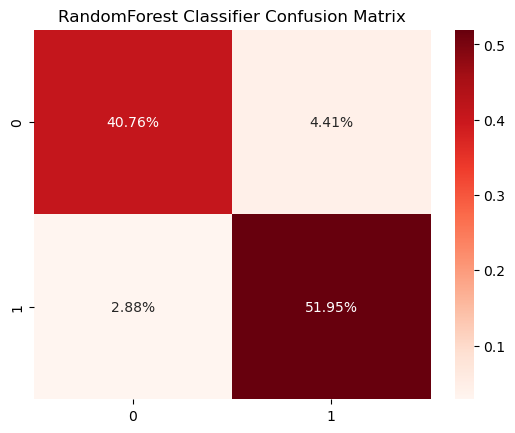

In [66]:
# confusion Maxtrix
cm3 = confusion_matrix(y_tests, pred_dt_smt)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

## SVM USING SMOOTE

In [69]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']
}

sv_smt = SVC(random_state = 0)
CV_sv_smt = GridSearchCV(estimator=sv_smt, verbose = 3, param_grid=param_grid, cv= 3)
CV_sv_smt.fit(X_trains, y_trains)
CV_sv_smt.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   2.6s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   2.4s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.554 total time=   2.5s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.555 total time=   2.3s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.555 total time=   2.3s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.554 total time=   2.2s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.866 total time=   2.1s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.870 total time=   2.1s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.870 total time=   2.1s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.895 total time=   1.5s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.896 total time=   1.5s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [71]:
model_svm_smt = SVC(C = 100, gamma = 0.01, kernel='rbf', random_state = 0)
model_svm_smt.fit(X_trains, y_trains)

SVC(C=100, gamma=0.01, random_state=0)

In [72]:
# Making Prediction
pred_svm_smt = model_svm_smt.predict(X_tests)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # algorithm for call accuracy_score, precision_score, recall score and f1-score

print('Accuracy :', round(accuracy_score(y_tests, pred_svm_smt)*100,2),"%")
print('Precision:', round(precision_score(y_tests, pred_svm_smt, average='weighted', zero_division=0)*100,2),"%")
print('Recall:', round(recall_score(y_tests, pred_svm_smt, average='weighted', zero_division=0)*100,2), "%")
print('f1-score:',round(f1_score(y_tests,pred_svm_smt, average='weighted', zero_division=0)*100,2), "%")

Accuracy : 98.56 %
Precision: 98.56 %
Recall: 98.56 %
f1-score: 98.56 %


In [74]:
print(classification_report(y_tests,pred_svm_smt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       533
           1       0.99      0.98      0.99       647

    accuracy                           0.99      1180
   macro avg       0.99      0.99      0.99      1180
weighted avg       0.99      0.99      0.99      1180



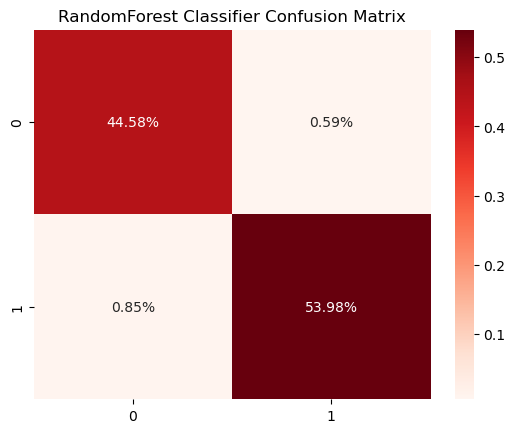

In [75]:
# confusion Maxtrix
cm3 = confusion_matrix(y_tests, pred_svm_smt)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

In [76]:
# save best model SVM
import pickle

filename = 'model.sav'
pickle.dump(model_svm_smt, open(filename, 'wb'))

In [77]:
load_model = pickle.load(open(filename, 'rb'))

In [78]:
load_model.score(X_tests, y_tests)

0.985593220338983